# Homework 5

Assignment:

Write your own Runge-Kutta scheme to calculate the orbit of two equal mass binary.
The mass of each binary makes
GM_{i}=1, (i is 1 or 2).
The two binary stars are
seperated by a distance of 1 initially.
Initialize the binary velocity so that
each binary star will have an eccentricity of 0.
Evolve this system to 100
binary orbits, and plot their orbits in the x-y plane.


For my own reference, I am including the Range-Kutta 4 (RK4) markdown from lecture. This way I can refer to it to write my program.

###  Runge-Kutta Rule

Based on integral
\begin{equation}
{\bf y}(t)=\int {\bf f}(t,y)dt
\end{equation}
So
\begin{equation}
{\bf y}_{n+1}={\bf y}_{n}+\int_{t_{n}}^{t_{n+1}}{\bf f}(t,y)dt
\end{equation}

RK 2 is
\begin{equation}
{\bf y}_{n+1}\simeq {\bf y}_{n}+{\bf f}(t_{n+1/2},y_{n+1/2})h+O(h^3)
\end{equation}
and ${\bf f}(t_{n+1/2},y_{n+1/2})$ is derived with Euler method.
\begin{eqnarray}
{\bf y}_{n+1}&\simeq &{\bf y}_{n}+{\bf k_{2}}\\
{\bf k_{2}}&=&h {\bf f}(t_{n}+h/2,{\bf y}_{n}+\frac{{\bf k_{1}}}{2})\qquad {\bf k}_{1}=h{\bf f}(t_n,{\bf y}_{n})
\end{eqnarray}

RK 4 is
\begin{eqnarray}
{\bf y}_{n+1}&\simeq &{\bf y}_{n}+\frac{1}{6}({\bf k_{1}}+2{\bf k_{2}}+2{\bf k_{3}}+{\bf k_{4}})\\
{\bf k}_{1}&=&h{\bf f}(t_n,{\bf y}_{n})\\
{\bf k_{2}}&=&h {\bf f}(t_{n}+h/2,{\bf y}_{n}+\frac{{\bf k_{1}}}{2})\\
{\bf k_{3}}&=&h {\bf f}(t_{n}+h/2,{\bf y}_{n}+\frac{{\bf k_{2}}}{2})\\
{\bf k_{4}}&=&h {\bf f}(t_{n}+h,{\bf y}_{n}+{\bf k_{3}})
\end{eqnarray}

In creating the binary star orbit, I am making a few key assumptions:

- The orbit is circular (eccentricity = 0)
- This makes the initial velocity of each star $v_y = \pm \frac{1}{\sqrt{2}}$
- The masses are both equal to 1 arbitrary unit.
- The initial distance between the stars is equal to 1 arbitrary unit.

Before I define variables, I first do some math to find the eight equations I will need. I first looks at the gravitational force of mass 1 on mass 2, where mass 1 is left of the origin on the y axis, and mass 2 is right of the origin on the y axis. I can make a quick graph of this below.

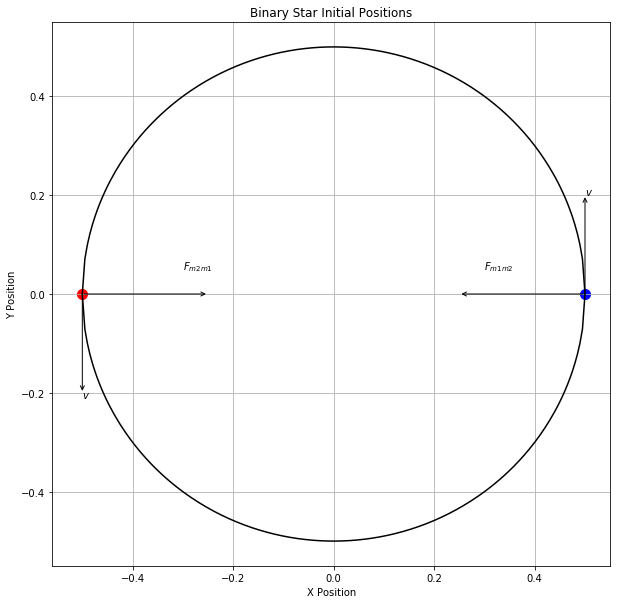

In [3]:
import numpy as np
import matplotlib.pyplot as plt

star1 = np.array([-0.5, 0])
star2 = np.array([0.5, 0])

x = np.linspace(-0.5, 0.5, 200)
y1 = np.sqrt(0.5**2 - x**2)
y2 = -np.sqrt(0.5**2 - x**2)

plt.figure(figsize=(10,10))
plt.scatter(star1[0], star2[1], c='r', s=100)
plt.scatter(star2[0], star2[1], c='blue', s=100)
plt.plot(x, y1, c='black')
plt.plot(x, y2, c='black')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.annotate(s=r'$F_{m1m2}$', xy=(0.3, 0.05))
plt.annotate("", xy=(0.25, 0), xytext=(0.5, 0), arrowprops=dict(arrowstyle="->"))
plt.annotate(s=r'$F_{m2m1}$', xy=(-0.3, 0.05))
plt.annotate("", xy=(-0.25, 0), xytext=(-0.5, 0), arrowprops=dict(arrowstyle="->"))
plt.annotate(s='$v$', xy=(0.50, 0.2))
plt.annotate("", xy=(0.5, 0.2), xytext=(0.5, 0), arrowprops=dict(arrowstyle="->"))
plt.annotate(s='$v$', xy=(-0.5, -0.21))
plt.annotate("", xy=(-0.5, -0.2), xytext=(-0.5, 0), arrowprops=dict(arrowstyle="->"))
plt.grid()
plt.title('Binary Star Initial Positions')
plt.show()

From the above graph, the positions of the two stars are initialized at (-0.5, 0) and (0.5, 0). Since the masses are equal, the gravitational force of mass 1 on mass 2 $F_{m1m2}$ is equal in magnitude and opposite in direction to the gravitational force of mass 2 on mass 1 $F_{m2m1}$.

From these initial conditions, I can construct eight equations to represent the orbits of the binary star system:

\begin{eqnarray}
\frac{d_{x_1}}{dt} = v_{x_1}\\
\frac{d_{v_{x_1}}}{dt} = \frac{-Gm\Delta x}{r_1^{3}}\\
\frac{d_{y_1}}{dt} = v_{y_1}\\
\frac{d_{v_{y_1}}}{dt} = \frac{-Gm\Delta y}{r_1^{3}}\\
\end{eqnarray}

where $(x_1, y_1)$ is the position of mass 1 (left of origin).

Since $F_{m2m1} = -F_{m1m2}$,

\begin{eqnarray}
\frac{d_{x_2}}{dt} = v_{x_2}\\
\frac{d_{v_{x_2}}}{dt} = \frac{Gm\Delta x}{r_1^{3}}\\
\frac{d_{y_2}}{dt} = v_{y_2}\\
\frac{d_{v_{y_2}}}{dt} = \frac{Gm\Delta y}{r_1^{3}}\\
\end{eqnarray}

In both sets of equations, 
\begin{equation}
r_1 = \sqrt{(x_1 - x_2)^2+ (y_1 - y_2)^2}\\
\Delta x = x_1 - x_2\\
\Delta y = y_1 - y_2
\end{equation}

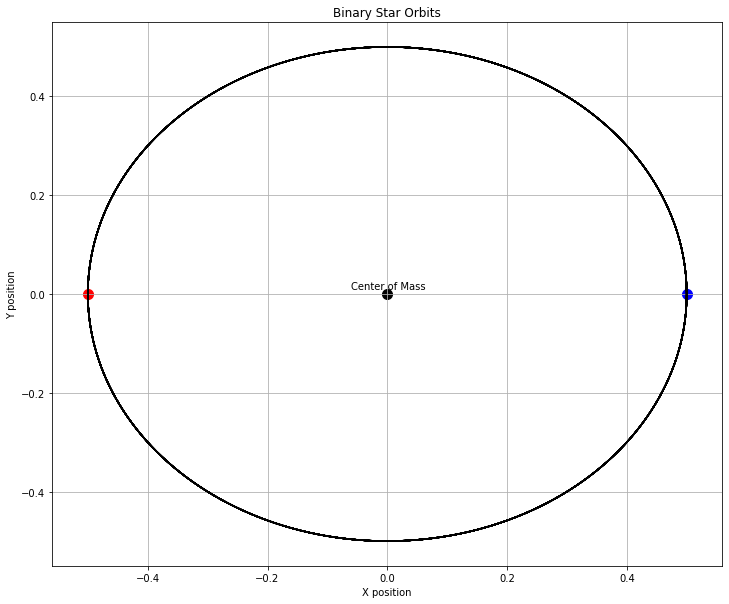

In [22]:
"""
Firstly, I import the relevant libraries and define the necessary constants for the program.
"""

import numpy as np
import matplotlib.pyplot as plt

G=1.
M=1.
tend=2.*np.pi*5
h=0.001
t=0

"""
The y-array for a binary star orbit will contain eight elements: 
y[0] = x1, y[1] = vx1, y[2] = y1, y[3] = vy1,
y[4] = x2, y[5] = vx2, y[6] = y2, y[7] = vy2
"""

y = [0.5, 0., 0., 1/np.sqrt(2.),
    -0.5, 0., 0., -1/np.sqrt(2.)]

def f(t, y):
    f=np.zeros(8)
    r1=np.sqrt((y[0]-y[4])**2+(y[2]-y[6])**2)
    #r2=np.sqrt(y[4]*y[4]+y[6]*y[6])
    f[0]=y[1]
    f[1]=-G*M/r1/r1/r1*(y[0]-y[4])
    f[2]=y[3]
    f[3]=-G*M/r1/r1/r1*(y[2]-y[6])
    f[4]=y[5]
    f[5]=-G*M/r1/r1/r1*(y[4]-y[0])  
    #f[5]=-f[1]
    f[6]=y[7]
    f[7]=-G*M/r1/r1/r1*(y[6]-y[2]) 
    #f[7]=-f[3]
    return f

def rk4(t, h, y, n):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)
    k4=h*f(t+h,y+k3)
    y+=1/6*(k1+2*k2+2*k3+k4)
    return y

xp1=[]
yp1=[]
xp2=[]
yp2=[]
while(t<tend):
    if((t+h)>tend):
        h=tend-t
    y = rk4(t,h,y,8)
    xp1=np.append(xp1,y[0])
    yp1=np.append(yp1,y[2])
    xp2=np.append(xp2,y[4])
    yp2=np.append(yp2,y[6])
    t = t+h

plt.figure(figsize=(12,10))
plt.plot(xp1,yp1, c='black')
plt.plot(xp2,yp2, c='black')
plt.scatter(0, 0, s=100, c="black")
plt.scatter(0.5, 0, s=100, c="blue")
plt.scatter(-0.5, 0, s=100, c='red')
plt.annotate(s='Center of Mass', xy=(-0.06, 0.01))
plt.xlabel('X position')
plt.ylabel('Y position')
plt.title('Binary Star Orbits')
plt.grid()
plt.show()

From the above graph, we see that the two stars each orbit around their center of mass. Because of the assumptions that were made to initalize the orbits (identical mass, identical starting speeds, eccenctricity=0), we can see that each star's orbital path is also identical after one complete orbit. 